In [1]:
import numpy as np
import os
import time
import scipy
import glob
import sys
from datetime import datetime
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

import importlib
import pandas as pd
import scipy.stats as spstats

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

In [2]:
importlib.reload(util)
util.set_sns_style(style='dark')
%matplotlib notebook

In [3]:
# if util.get_os() == 'Linux':
#     rootdir = '/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'
# elif util.get_os() == 'Darwin':
#     rootdir = '/home/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
# else:
#     rootdir=None
#     print("Unknown os: {}".format(util.get_os()))
rootdir = util.get_rootdir()
experiment = 'PAM_activation_fed-flies'

src_dir = os.path.join(rootdir, experiment)
# # src_dir = '/Users/julianarhee/Documents/rutalab/data/test'
# print(src_dir)
fig_id = os.path.join('/Edge_Tracking', rootdir.split('/Edge_Tracking/')[1], experiment)
print(fig_id)
savedir = '{}/jyr/{}'.format(rootdir, experiment)
savedir = savedir.replace(" ", "")
figdir = os.path.join(savedir, 'figures')
print("Saving figures to:{}    {}".format('\n', figdir))
if not os.path.exists(figdir):
    os.makedirs(figdir)

/Edge_Tracking/Data/PAM_activation_fed-flies
Saving figures to:
    /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures


In [4]:
# copy files?
copy_files=False
orig_log = glob.glob(os.path.join(src_dir, '*.log'))
copied_log = glob.glob(os.path.join(savedir, 'raw', '*.log'))
if len(orig_log)==0 and len(copied_log)==0:
    copy_files=True
    print("Need to copy files from orig loc to <{}>".format(os.path.join(savedir, 'raw')))
else:
    src_dir = os.path.join(savedir, 'raw')
    print("Found {} .log file in new src dir: {}".format(len(copied_log), src_dir))
if copy_files:
    import shutil
    for tmp_src in os.listdir(os.path.join(src_dir, 'multiple_reinforcement')):
        curr_logs = glob.glob(os.path.join(src_dir, 'multiple_reinforcement', tmp_src, '*.log'))
        for fn in curr_logs:
            fbase = os.path.split(fn)[-1]
            shutil.copy(fn, os.path.join(savedir, fbase))


Found 21 .log file in new src dir: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/raw


In [5]:
log_files = butil.get_log_files(src_dir=src_dir, experiment=experiment, verbose=False, is_gdrive=False,
                        return_loginfo=False)

Checking parent dir.
Found 21 tracking files.


In [201]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

Processing 21 tracking files.


<IPython.core.display.Javascript object>


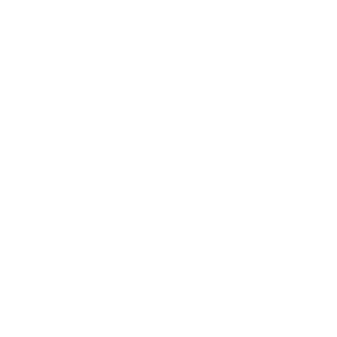

[WARNING] 09252020-111252_Fly1_PAMChr_fed_no_lights: Found bad skips, removing 15661 of 35873 samples.


<IPython.core.display.Javascript object>


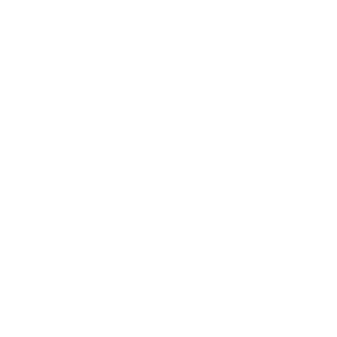

[WARNING] 09252020-112354_Fly1_PAMChr_fed_single: Found bad skips, removing 6494 of 39566 samples.
Correcting experiment conditions: PAM_activation_fed-flies
Saving combined df to: /home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies
Found 3 conditions:
pamchr_fed_no_lights
pamchr_fed_single
pamchr_fed_lights


In [202]:
strip_width=50
strip_sep=200
# is_csv = False
df0_all = butil.load_combined_df(log_files=log_files, logdf=None, 
                                is_csv=False, experiment=experiment, 
                                savedir=savedir, save_errors=True, create_new=True,
                                parse_filename=True, remove_invalid=True, process=True)
#df0_all = df0_all.rename(columns={'Unnamed: 0': 'frame'})
condition_list = df0_all['condition'].unique()
print("Found {} conditions:".format(len(condition_list)))
for c in condition_list:
    print(c)

In [203]:
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

<IPython.core.display.Javascript object>


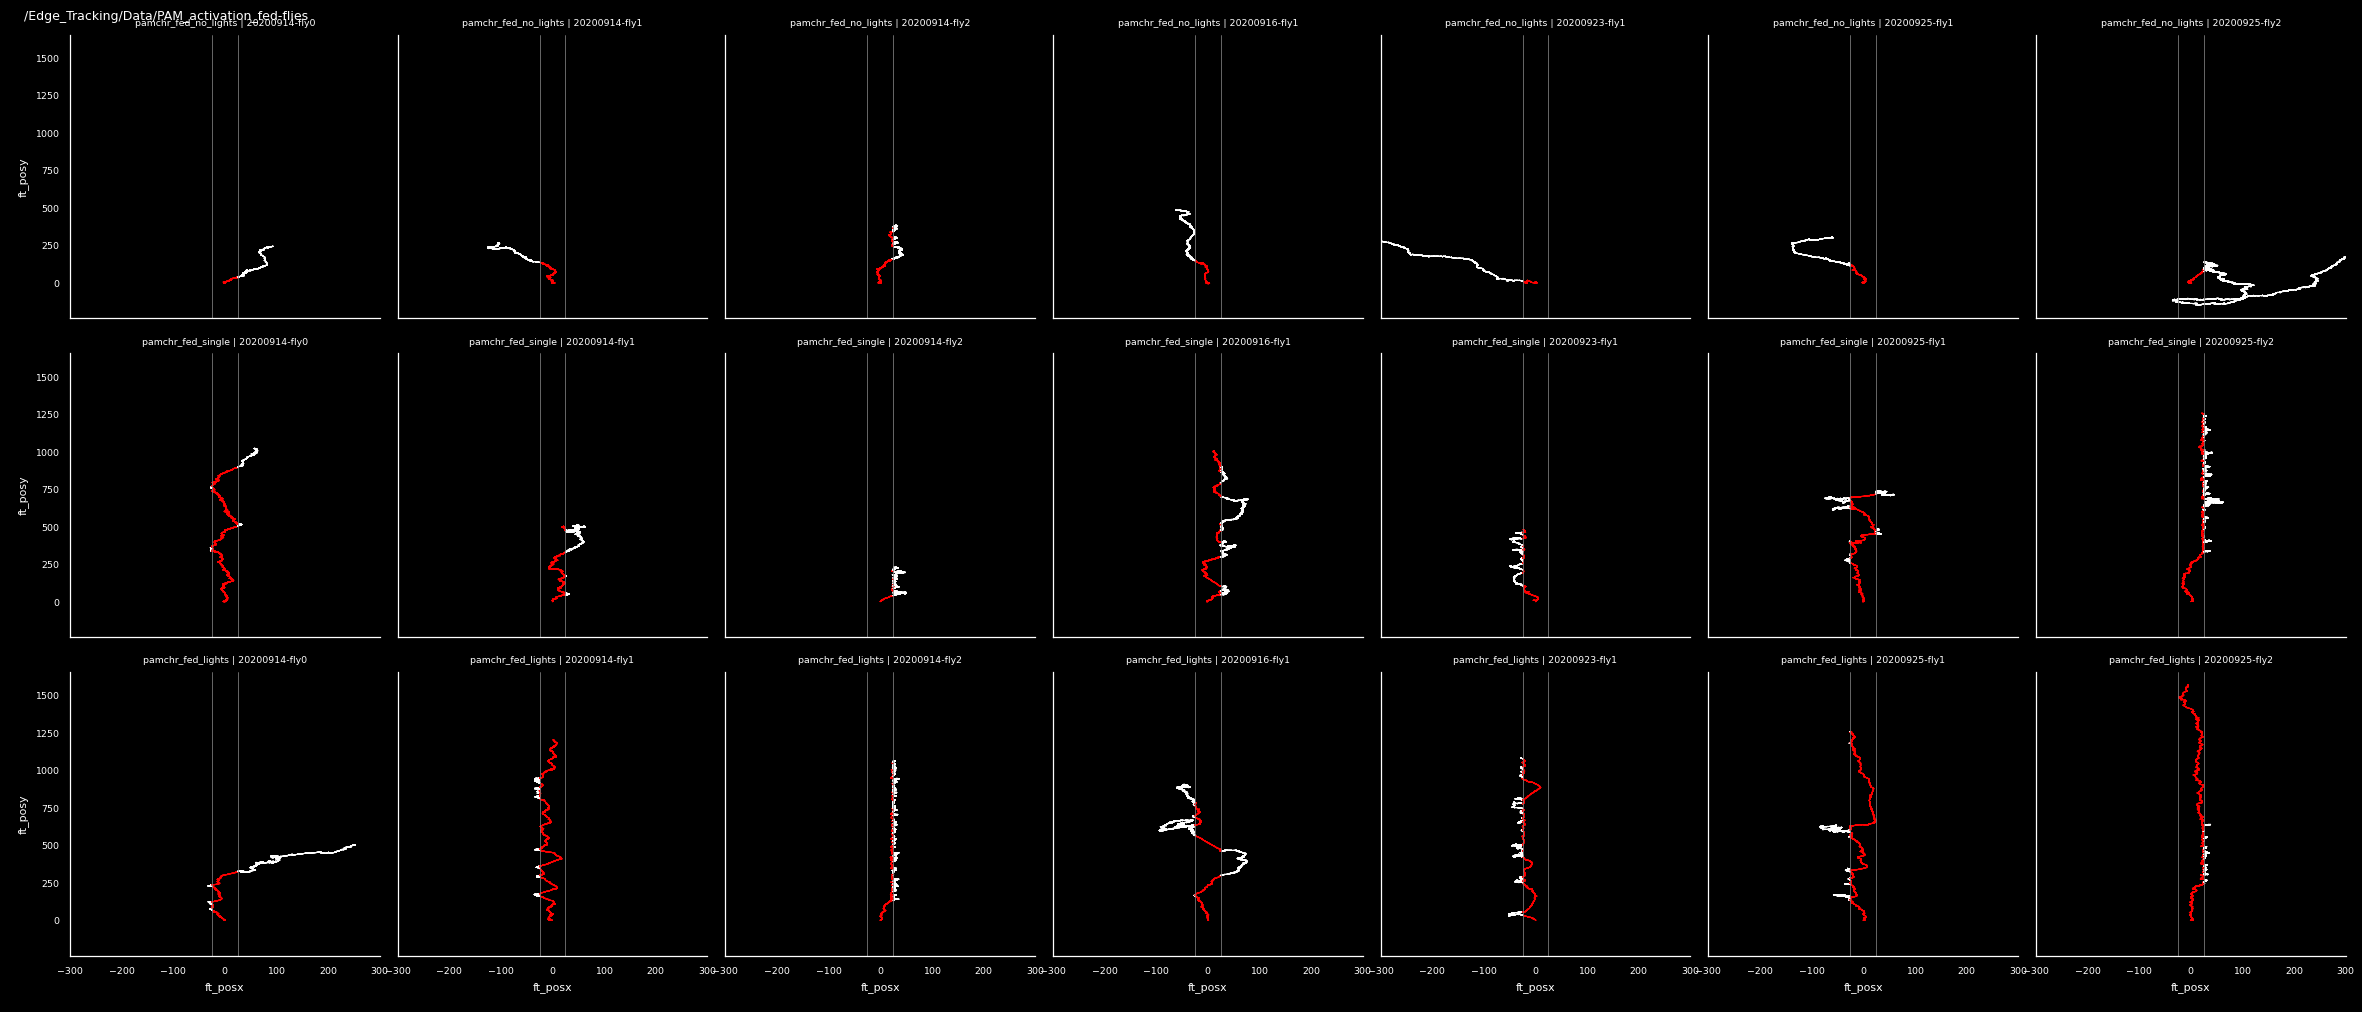

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj-all-by-cond


In [204]:
# plot fly x cond
fig = butil.plot_fly_by_condition(df0_all, strip_width=strip_width,
                                 row_order=['pamchr_fed_no_lights', 'pamchr_fed_single', 'pamchr_fed_lights'])
# save
figname = 'traj-all-by-cond'
util.label_figure(fig, fig_id)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname))) #, dpi=dpi)
print(figdir, figname)


## plot each individual's conditions

In [205]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [206]:
if not os.path.exists(os.path.join(figdir, 'individuals')):
    os.makedirs(os.path.join(figdir, 'individuals'))

20200914-fly0 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


/tmp/ipykernel_1176482/1838819307.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for fly_id, df_ in df0_all.groupby(['fly_id']):


<IPython.core.display.Javascript object>


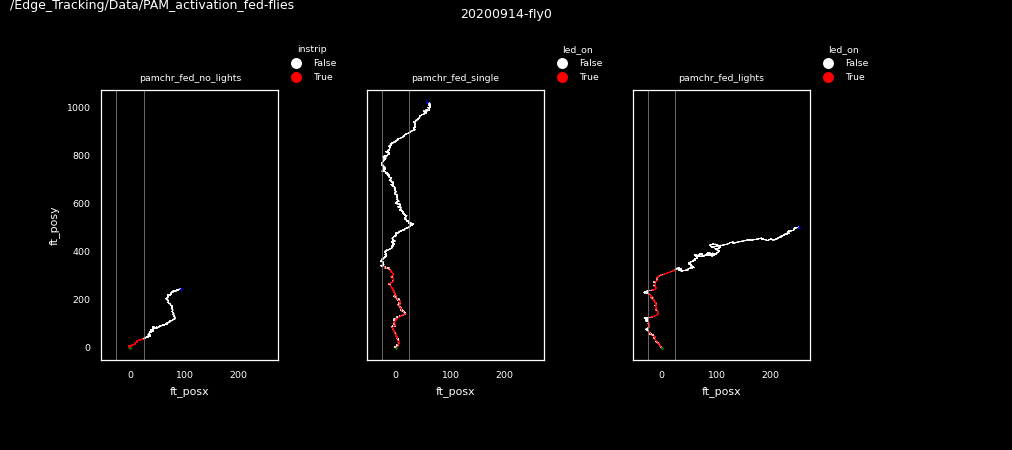

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200914-fly0
20200914-fly1 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


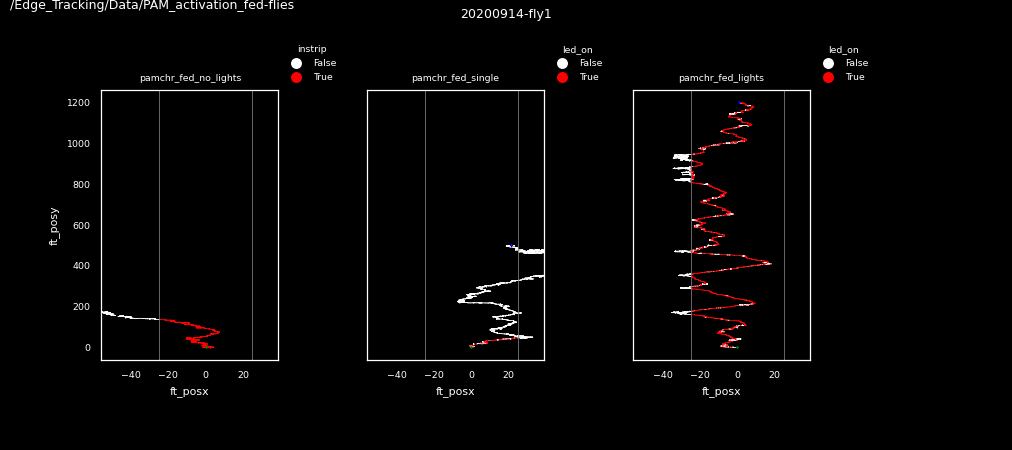

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200914-fly1
20200914-fly2 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


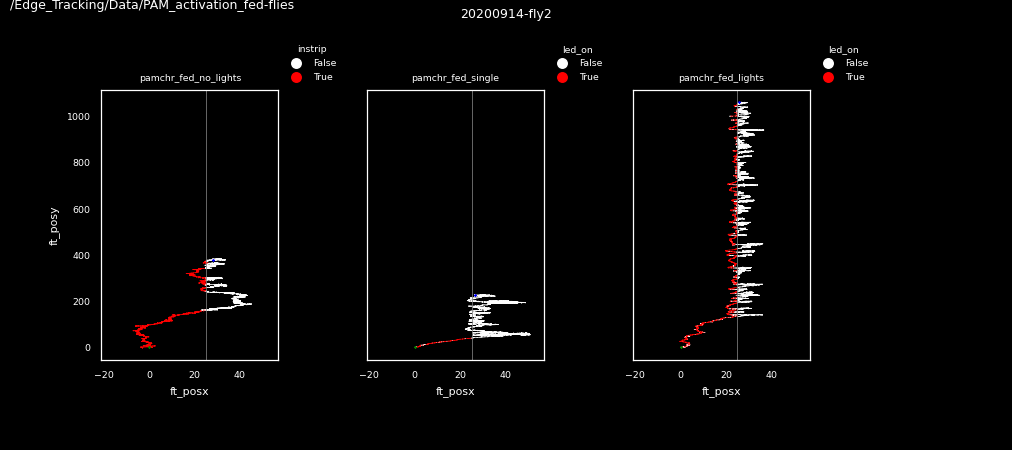

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200914-fly2
20200916-fly1 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


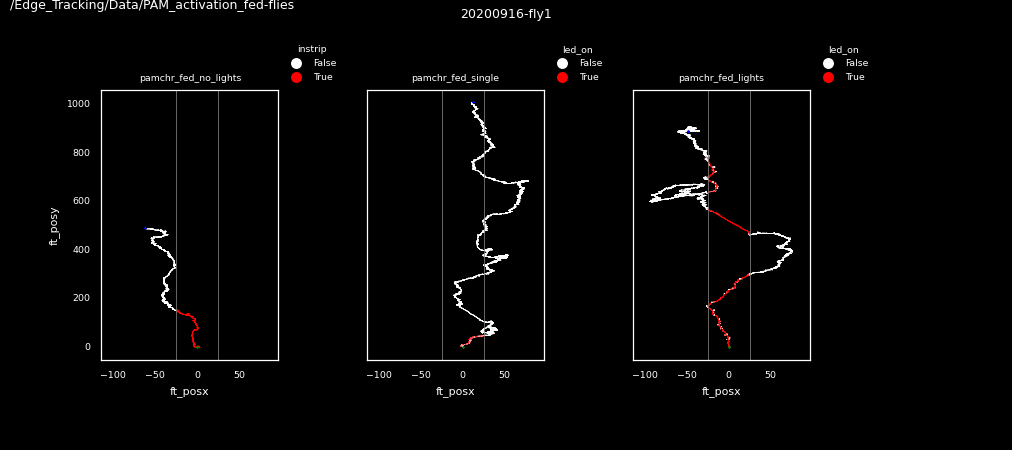

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200916-fly1
20200923-fly1 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


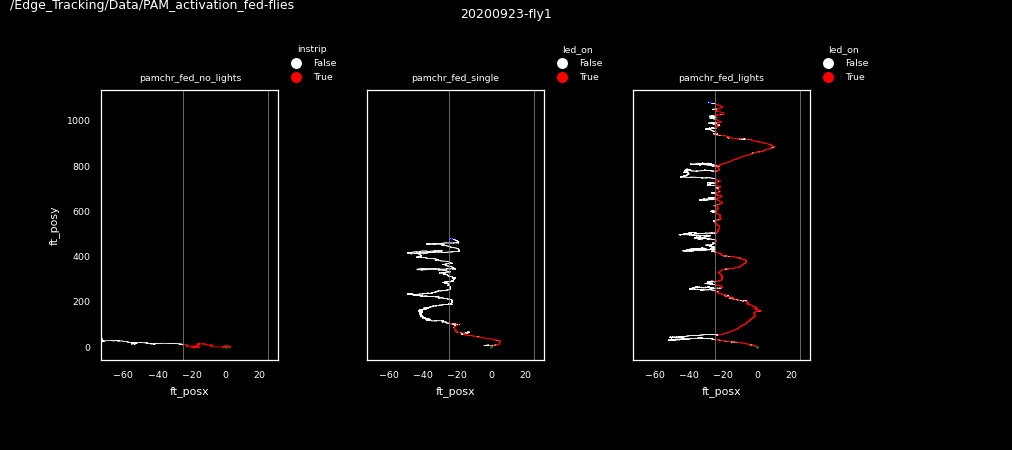

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200923-fly1
20200925-fly1 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


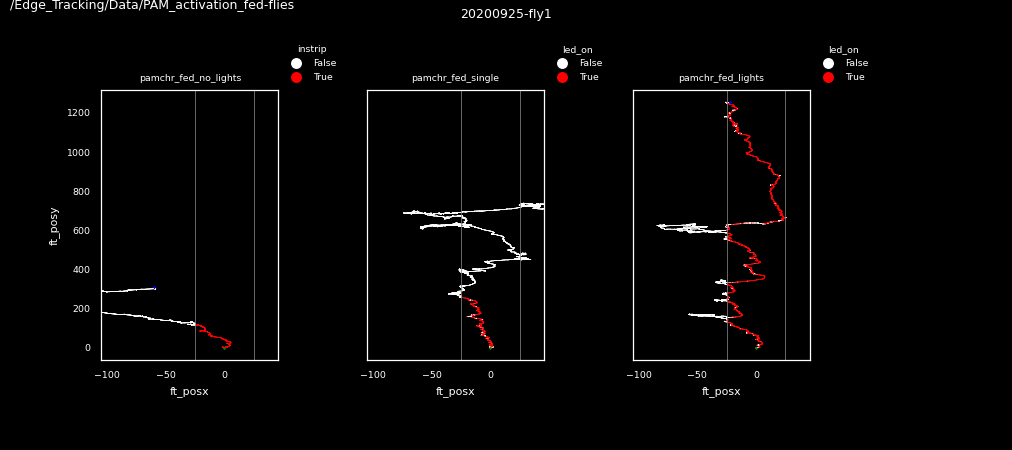

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200925-fly1
20200925-fly2 ['pamchr_fed_no_lights' 'pamchr_fed_single' 'pamchr_fed_lights']


<IPython.core.display.Javascript object>


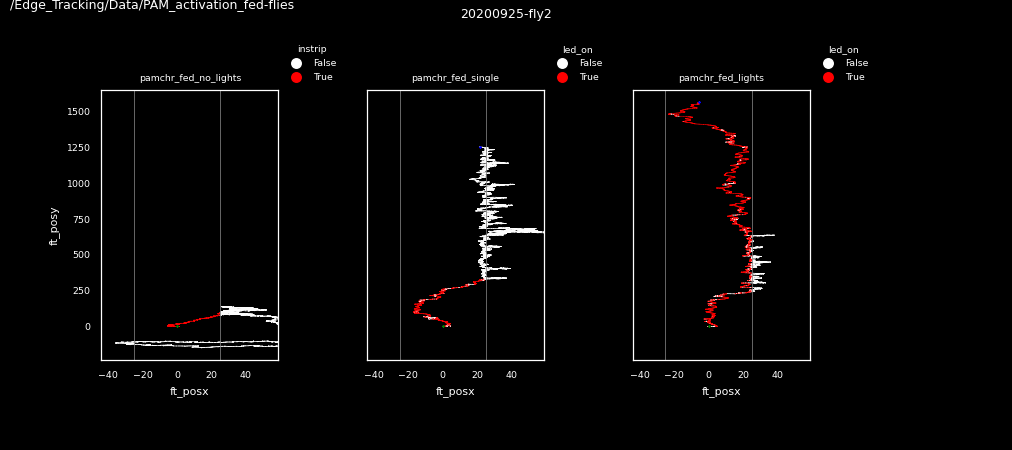

/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data/jyr/PAM_activation_fed-flies/figures traj_20200925-fly2


In [207]:
# add odor corridor to facet grid
for fly_id, df_ in df0_all.groupby(['fly_id']):
    conds = df_['condition'].unique()
    print(fly_id, conds)
    nc = len(conds)
    fig, axn = pl.subplots(1, nc, figsize=(nc*3, 4), sharex=True, sharey=True)
    for ai, (ax, cond) in enumerate(zip(fig.axes, conds)):
        currdf = df_[df_['condition']==cond].copy()
        odor_xmin, odor_xmax = (-25, 25) #odor_borders[fly_id]
        try:
            if cond in ['pamchr_fed_single', 'pamchr_fed_lights']:
                butil.plot_trajectory(currdf, odor_bounds=[(odor_xmin, odor_xmax)], 
                              hue_varname='led_on', ax=ax, start_size=1, markersize=0.25, legend_loc='lower left')
            else:
                butil.plot_trajectory(currdf, odor_bounds=[(odor_xmin, odor_xmax)], 
                              hue_varname='instrip', ax=ax, start_size=1, markersize=0.25, legend_loc='lower left')
        except ValueError:
            continue
        ax.set_title(cond, fontsize=6)
        #butil.plot_odor_corridor(ax, odor_xmin=odor_xmin, odor_xmax=odor_xmax)
    pl.subplots_adjust(bottom=0.2, right=0.8, top=0.8, wspace=0.5, left=0.1)
    fig.suptitle(fly_id, fontsize=8)
    util.label_figure(fig, fig_id)
    figname = 'traj_{}'.format(fly_id)
    pl.savefig(os.path.join(figdir, 'individuals', '{}.png'.format(figname)))
    print(figdir, figname)

In [199]:
currdf[['led1_stpt', 'led2_stpt', 'led_on']]

,led1_stpt,led2_stpt,led_on
0,0.0,0.0,True
1,0.0,0.0,True
2,0.0,0.0,True
3,0.0,0.0,True
4,1.0,0.0,False
...,...,...,...
14212,1.0,0.0,False
14213,1.0,0.0,False
14214,0.0,0.0,True
14215,1.0,0.0,False


In [200]:
df0_all['date'].min(), df0_all['date'].max()

(20200914, 20200925)

In [8]:
df0_all.columns

Index(['timestamp -- motor_step_command', 'mfc1_stpt', 'mfc2_stpt',
       'mfc3_stpt', 'led1_stpt', 'led2_stpt', 'ft_posx', 'ft_posy',
       'ft_heading', 'ft_frame', 'ft_error', 'ft_roll', 'ft_pitch', 'ft_yaw',
       'filename', 'fpath', 'timestamp', 'motor_step_command', 'time',
       'rel_time', 'date', 'odor_on', 'strip_type', 'led_on', 'instrip',
       'experiment', 'fly_name', 'condition', 'trial', 'fly_id', 'trial_id',
       'boutnum', 'cum_time', 'speed', 'upwind_speed', 'crosswind_speed',
       'euclid_dist', 'upwind_dist', 'crosswind_dist'],
      dtype='object')

### check gradient odor strip

In [10]:
mfc_dict={}
for logfn, df_ in df0_all.groupby('filename'):
    mfc_ = butil.get_mfc_params(df_)
    mfc_dict.update({logfn: mfc_})

In [12]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [13]:
pp.pprint(mfc_dict)

{   '09142020-103649_Fly0_fed_no_lights': {   'air_max': 0.975975975975976,
                                              'air_mfc': 'mfc1_stpt',
                                              'air_min': 0.9286590584709428,
                                              'odor_mfc': 'mfc3_stpt',
                                              'odor_mfc_max': 0.0473169175050331,
                                              'odor_mfc_min': 0.0088887004922089,
                                              'percent_odor': 0.048},
    '09142020-104819_Fly0_fed_single': {   'air_max': 0.975975975975976,
                                           'air_mfc': 'mfc1_stpt',
                                           'air_min': 0.0933742285698289,
                                           'odor_mfc': 'mfc3_stpt',
                                           'odor_mfc_max': 0.882601747406147,
                                           'odor_mfc_min': 0.009537807160219,
                                  

In [18]:
df0_all['fly_id'].unique()

array(['20200914-fly0', '20200914-fly1', '20200914-fly2', '20200916-fly1',
       '20200923-fly1', '20200925-fly1', '20200925-fly2'], dtype=object)

<IPython.core.display.Javascript object>


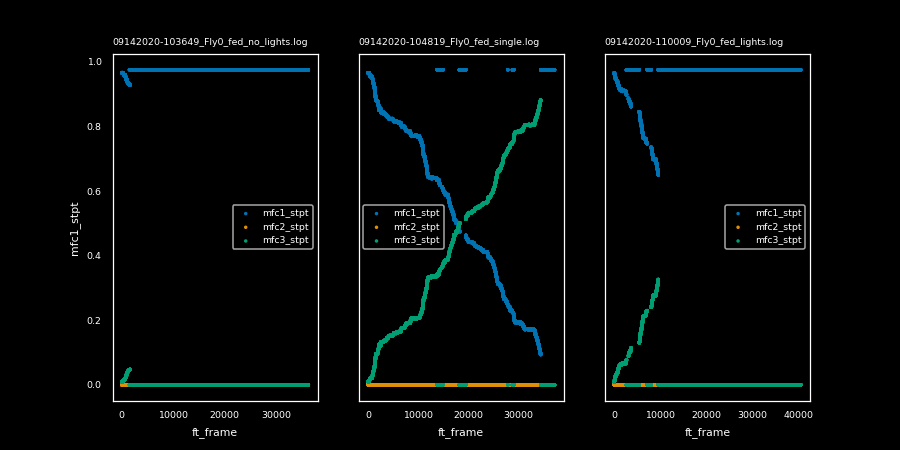

In [25]:
fly_id = '20200914-fly0'
curr_fns = df0_all[df0_all['fly_id'] == fly_id]['fpath'].unique()

fig, axn = pl.subplots(1, 3, sharey=True, figsize=(8,4))
for ax, fn in zip(axn.flat, curr_fns):
    d_ = pd.read_csv(fn)
    mfc_vars = ['mfc{}_stpt'.format(i) for i in [1,2,3]]
    mfc_cols = sns.color_palette('colorblind', n_colors=3)
    for m, c in zip(mfc_vars, mfc_cols):
        sns.scatterplot(data=d_, ax=ax, x='ft_frame', y=m, c=c, edgecolor='none', s=5, label=m)
    ax.set_title(os.path.split(fn)[-1], loc='left', fontsize=6)


In [182]:
importlib.reload(butil)

<module 'behavior' from '/home/julianarhee/Repositories/plume-tracking/behavior.py'>

In [186]:
et_flies = []
for (fly_id, cond), df_ in df0_all.groupby(['fly_id', 'condition']):
    is_et = butil.is_edgetracking(df_, strip_width=strip_width)
    print(fly_id, cond, is_et)
    if is_et:
        et_flies.append(fly_id)
et_flies = np.unique(et_flies)


20200914-fly0 pamchr_fed_lights False
20200914-fly0 pamchr_fed_no_lights False
20200914-fly0 pamchr_fed_single False
20200914-fly1 pamchr_fed_lights True
20200914-fly1 pamchr_fed_no_lights False
20200914-fly1 pamchr_fed_single False
20200914-fly2 pamchr_fed_lights True
20200914-fly2 pamchr_fed_no_lights True
20200914-fly2 pamchr_fed_single True
20200916-fly1 pamchr_fed_lights True
20200916-fly1 pamchr_fed_no_lights False
20200916-fly1 pamchr_fed_single True
20200923-fly1 pamchr_fed_lights True
20200923-fly1 pamchr_fed_no_lights False
20200923-fly1 pamchr_fed_single True
20200925-fly1 pamchr_fed_lights True
20200925-fly1 pamchr_fed_no_lights False
20200925-fly1 pamchr_fed_single False
20200925-fly2 pamchr_fed_lights True
20200925-fly2 pamchr_fed_no_lights False
20200925-fly2 pamchr_fed_single True


In [187]:
et_flies

array(['20200914-fly1', '20200914-fly2', '20200916-fly1', '20200923-fly1',
       '20200925-fly1', '20200925-fly2'], dtype='<U13')

In [188]:
et = df0_all[df0_all['fly_id'].isin(et_flies)].copy()